# Synthetic data

<IPython.core.display.Javascript object>


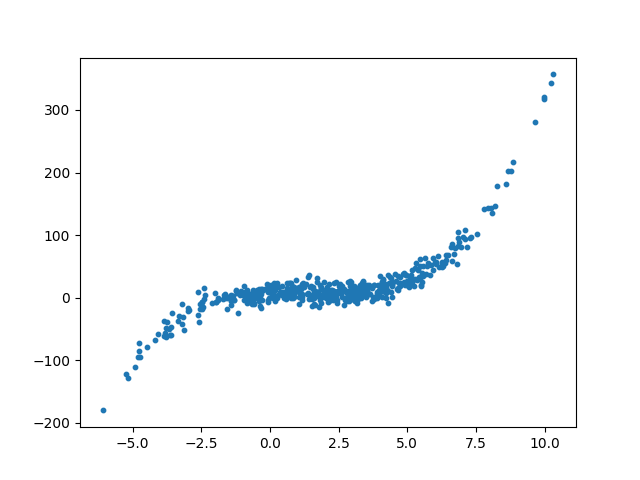

In [19]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

N = 500
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, N)
y = 10. + X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 10, N)

fig,ax = plt.subplots()
ax.scatter(X,y, s=10)

# Use OLS to fit this data

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
Xols = poly.fit_transform(np.reshape(X,(N,1)))

model = sm.OLS(y, Xols)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     3888.
Date:                Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:02:51   Log-Likelihood:                -1846.8
No. Observations:                 500   AIC:                             3702.
Df Residuals:                     496   BIC:                             3718.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.5372      0.673     12.679      0.0

<IPython.core.display.Javascript object>


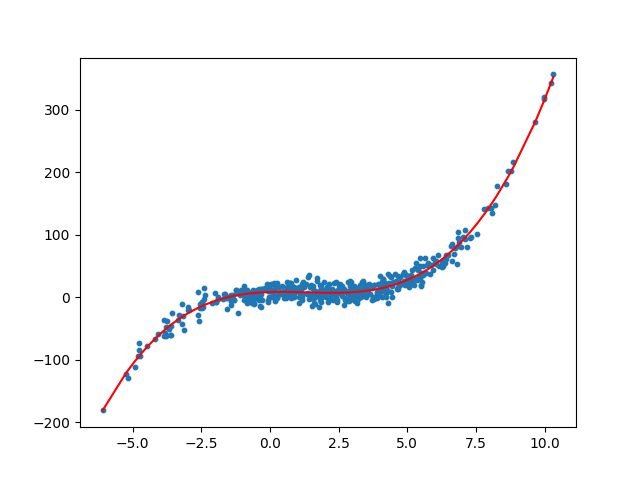

In [41]:
fig,ax = plt.subplots()
ax.scatter(X,y, s=10)
sorted_order = np.argsort(X)
ax.plot(X[sorted_order],results.fittedvalues[sorted_order],'r')

# Computing the confiden

In [53]:
param_conf = results.conf_int(alpha=0.05, cols=None)
x0 =np.linspace(min(X),max(X),100)

In [57]:
fx0 = []
for a in param_conf[0,:]:
    for b in param_conf[1,:]:
        for c in param_conf[2,:]:
            for d in param_conf[3,:]:
                fx0.append(a + b*x0 + c*x0**2 + d*x0**3)

7.21426094307012
9.86016688954674


<IPython.core.display.Javascript object>


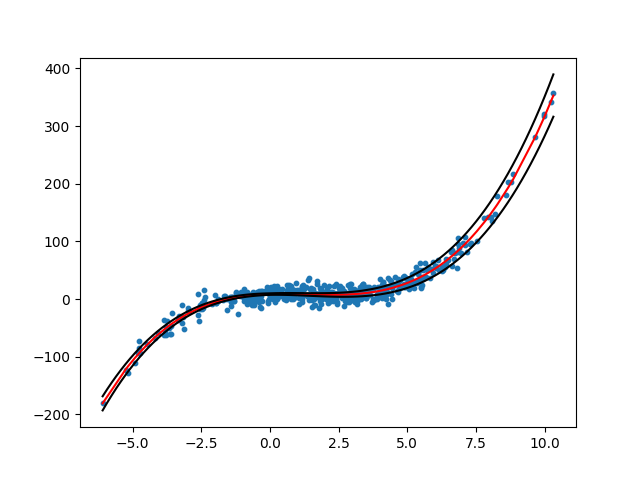

In [70]:
fig,ax = plt.subplots()
ax.scatter(X,y, s=10)
sorted_order = np.argsort(X)
ax.plot(X[sorted_order],results.fittedvalues[sorted_order],'r')

ax.plot(x0,np.max(fx0,0),'k')
ax.plot(x0,np.min(fx0,0),'k')